In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import datetime
import time
from dateutil import parser
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Pressure data analysys

In [3]:
def dataparser(dataframe):
    for i in range(len(dataframe["TotalTime"])):
        dataframe['TotalTime'][i] = dataframe['Date'][i] + " " + dataframe['Time'][i]
        dataframe['TotalTime'][i] = parser.parse(dataframe["TotalTime"][i])
    return dataframe

In [4]:
def deltatime(dataframe):
    begin = dataframe["TotalTime"][0]
    for i in range(len(dataframe["TotalTime"])):   
        cur = dataframe["TotalTime"][i]
        delta = cur - begin
        dataframe["TotalTime"][i] = delta.seconds
    return dataframe

In [5]:
def pressure_plot(df1, df2, df3):
    x_data = [df1['TotalTime'], df2['TotalTime'], df3['TotalTime']]
    y_data = [df1['Pressure, kPa'], df2['Pressure, kPa'], df3['Pressure, kPa']]
    plt.figure(figsize=(20, 20))
    colormap = ["red", "green", "blue"]
    sensors = ['1', '2', '4']
    
    for i in range(1,4,1):
        ax = plt.subplot(2,2,i)
        plt.plot(x_data[i-1], y_data[i-1], color=colormap[i-1], label="Sensor" + sensors[i-1])
        plt.xlabel("Time, sec")
        plt.ylabel("Pressure, kPa")
        plt.grid(True)
        plt.legend()

In [30]:
def strtofloat(dataframe):
    for i in range(len(dataframe["Pressure, kPa"])):
        dataframe["Pressure, kPa"][i] = float(dataframe["Pressure, kPa"][i].replace(',','.'))
    return(dataframe)

In [9]:
sensor_1 = pd.read_csv("PRESSURE_OTKACHKA_1_27.11.2020_22.39 .xls", delimiter=',')
sensor_1.head(10)

,"Pressure, kPa",Time,Date
0,"3,49191",22:29:42.033,27.11.20
1,"3,508547",22:29:43.029,27.11.20
2,"3,539173",22:29:44.054,27.11.20
3,"3,541929",22:29:45.066,27.11.20
4,"3,561262",22:29:46.079,27.11.20
5,"3,547784",22:29:47.089,27.11.20
6,"3,592234",22:29:48.088,27.11.20
7,"3,594301",22:29:49.089,27.11.20
8,"3,577287",22:29:50.090,27.11.20
9,"3,59493",22:29:51.120,27.11.20


In [10]:
sensor_1['TotalTime'] = 0
dataparser(sensor_1)
sensor_1

,"Pressure, kPa",Time,Date,TotalTime
0,"3,49191",22:29:42.033,27.11.20,2020-11-27 22:29:42.033000
1,"3,508547",22:29:43.029,27.11.20,2020-11-27 22:29:43.029000
2,"3,539173",22:29:44.054,27.11.20,2020-11-27 22:29:44.054000
3,"3,541929",22:29:45.066,27.11.20,2020-11-27 22:29:45.066000
4,"3,561262",22:29:46.079,27.11.20,2020-11-27 22:29:46.079000
...,...,...,...,...
24132,"3,833375",5:14:06.512,28.11.20,2020-11-28 05:14:06.512000
24133,"3,834981",5:14:07.516,28.11.20,2020-11-28 05:14:07.516000
24134,"3,81654",5:14:08.516,28.11.20,2020-11-28 05:14:08.516000
24135,"3,836761",5:14:09.517,28.11.20,2020-11-28 05:14:09.517000


In [11]:
deltatime(sensor_1)

,"Pressure, kPa",Time,Date,TotalTime
0,"3,49191",22:29:42.033,27.11.20,0
1,"3,508547",22:29:43.029,27.11.20,0
2,"3,539173",22:29:44.054,27.11.20,2
3,"3,541929",22:29:45.066,27.11.20,3
4,"3,561262",22:29:46.079,27.11.20,4
...,...,...,...,...
24132,"3,833375",5:14:06.512,28.11.20,24264
24133,"3,834981",5:14:07.516,28.11.20,24265
24134,"3,81654",5:14:08.516,28.11.20,24266
24135,"3,836761",5:14:09.517,28.11.20,24267


In [12]:
strtofloat(sensor_1)

,"Pressure, kPa",Time,Date,TotalTime
0,3.49191,22:29:42.033,27.11.20,0
1,3.50855,22:29:43.029,27.11.20,0
2,3.53917,22:29:44.054,27.11.20,2
3,3.54193,22:29:45.066,27.11.20,3
4,3.56126,22:29:46.079,27.11.20,4
...,...,...,...,...
24132,3.83338,5:14:06.512,28.11.20,24264
24133,3.83498,5:14:07.516,28.11.20,24265
24134,3.81654,5:14:08.516,28.11.20,24266
24135,3.83676,5:14:09.517,28.11.20,24267


In [13]:
sensor_2 = pd.read_csv("PRESSURE_OTKACHKA_2_27.11.2020_22.39.xls", delimiter=',')
sensor_2.head(10)

,"Pressure, kPa",Time,Date
0,"0,1722565",22:29:42.345,27.11.20
1,"0,1740799",22:29:43.342,27.11.20
2,"0,1752014",22:29:44.368,27.11.20
3,"0,1769638",22:29:45.378,27.11.20
4,"0,1794357",22:29:46.389,27.11.20
5,"0,1764374",22:29:47.386,27.11.20
6,"0,1752243",22:29:48.402,27.11.20
7,"0,1769638",22:29:49.404,27.11.20
8,"0,1740723",22:29:50.402,27.11.20
9,"0,1722565",22:29:51.419,27.11.20


In [14]:
sensor_2['TotalTime'] = 0
dataparser(sensor_2)
sensor_2

,"Pressure, kPa",Time,Date,TotalTime
0,"0,1722565",22:29:42.345,27.11.20,2020-11-27 22:29:42.345000
1,"0,1740799",22:29:43.342,27.11.20,2020-11-27 22:29:43.342000
2,"0,1752014",22:29:44.368,27.11.20,2020-11-27 22:29:44.368000
3,"0,1769638",22:29:45.378,27.11.20,2020-11-27 22:29:45.378000
4,"0,1794357",22:29:46.389,27.11.20,2020-11-27 22:29:46.389000
...,...,...,...,...
34580,"-97,10417",8:09:19.008,28.11.20,2020-11-28 08:09:19.008000
34581,"-97,10474",8:09:19.991,28.11.20,2020-11-28 08:09:19.991000
34582,"-97,10474",8:09:20.958,28.11.20,2020-11-28 08:09:20.958000
34583,"-97,10417",8:09:21.953,28.11.20,2020-11-28 08:09:21.953000


In [15]:
deltatime(sensor_2)

,"Pressure, kPa",Time,Date,TotalTime
0,"0,1722565",22:29:42.345,27.11.20,0
1,"0,1740799",22:29:43.342,27.11.20,0
2,"0,1752014",22:29:44.368,27.11.20,2
3,"0,1769638",22:29:45.378,27.11.20,3
4,"0,1794357",22:29:46.389,27.11.20,4
...,...,...,...,...
34580,"-97,10417",8:09:19.008,28.11.20,34776
34581,"-97,10474",8:09:19.991,28.11.20,34777
34582,"-97,10474",8:09:20.958,28.11.20,34778
34583,"-97,10417",8:09:21.953,28.11.20,34779


In [16]:
strtofloat(sensor_2)

,"Pressure, kPa",Time,Date,TotalTime
0,0.172257,22:29:42.345,27.11.20,0
1,0.17408,22:29:43.342,27.11.20,0
2,0.175201,22:29:44.368,27.11.20,2
3,0.176964,22:29:45.378,27.11.20,3
4,0.179436,22:29:46.389,27.11.20,4
...,...,...,...,...
34580,-97.1042,8:09:19.008,28.11.20,34776
34581,-97.1047,8:09:19.991,28.11.20,34777
34582,-97.1047,8:09:20.958,28.11.20,34778
34583,-97.1042,8:09:21.953,28.11.20,34779


In [17]:
sensor_4 = pd.read_csv("PRESSURE_OTKACHKA_4_27.11.2020_22.39.xls", delimiter=',')
sensor_4.head(10)

,"Pressure, kPa",Time,Date
0,"-98,33908",22:29:42.655,27.11.20
1,"-98,33965",22:29:43.681,27.11.20
2,"-98,33965",22:29:44.682,27.11.20
3,"-98,33908",22:29:45.687,27.11.20
4,"-98,3385",22:29:46.700,27.11.20
5,"-98,33743",22:29:47.714,27.11.20
6,"-98,33908",22:29:48.720,27.11.20
7,"-98,33966",22:29:49.716,27.11.20
8,"-98,33794",22:29:50.726,27.11.20
9,"-98,33794",22:29:51.730,27.11.20


In [18]:
sensor_4['TotalTime'] = 0
dataparser(sensor_4)
sensor_4

,"Pressure, kPa",Time,Date,TotalTime
0,"-98,33908",22:29:42.655,27.11.20,2020-11-27 22:29:42.655000
1,"-98,33965",22:29:43.681,27.11.20,2020-11-27 22:29:43.681000
2,"-98,33965",22:29:44.682,27.11.20,2020-11-27 22:29:44.682000
3,"-98,33908",22:29:45.687,27.11.20,2020-11-27 22:29:45.687000
4,"-98,3385",22:29:46.700,27.11.20,2020-11-27 22:29:46.700000
...,...,...,...,...
28560,"-99,4353",6:28:18.888,28.11.20,2020-11-28 06:28:18.888000
28561,"-99,4353",6:28:19.895,28.11.20,2020-11-28 06:28:19.895000
28562,"-99,43414",6:28:20.898,28.11.20,2020-11-28 06:28:20.898000
28563,"-99,43242",6:28:21.896,28.11.20,2020-11-28 06:28:21.896000


In [19]:
deltatime(sensor_4)

,"Pressure, kPa",Time,Date,TotalTime
0,"-98,33908",22:29:42.655,27.11.20,0
1,"-98,33965",22:29:43.681,27.11.20,1
2,"-98,33965",22:29:44.682,27.11.20,2
3,"-98,33908",22:29:45.687,27.11.20,3
4,"-98,3385",22:29:46.700,27.11.20,4
...,...,...,...,...
28560,"-99,4353",6:28:18.888,28.11.20,28716
28561,"-99,4353",6:28:19.895,28.11.20,28717
28562,"-99,43414",6:28:20.898,28.11.20,28718
28563,"-99,43242",6:28:21.896,28.11.20,28719


In [20]:
strtofloat(sensor_4)

,"Pressure, kPa",Time,Date,TotalTime
0,-98.3391,22:29:42.655,27.11.20,0
1,-98.3397,22:29:43.681,27.11.20,1
2,-98.3397,22:29:44.682,27.11.20,2
3,-98.3391,22:29:45.687,27.11.20,3
4,-98.3385,22:29:46.700,27.11.20,4
...,...,...,...,...
28560,-99.4353,6:28:18.888,28.11.20,28716
28561,-99.4353,6:28:19.895,28.11.20,28717
28562,-99.4341,6:28:20.898,28.11.20,28718
28563,-99.4324,6:28:21.896,28.11.20,28719


In [21]:
sensors_info = [sensor_1.info(), sensor_2.info(), sensor_4.info()]
print(sensors_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24137 entries, 0 to 24136
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Pressure, kPa  24137 non-null  object
 1   Time           24137 non-null  object
 2   Date           24137 non-null  object
 3   TotalTime      24137 non-null  object
dtypes: object(4)
memory usage: 754.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34585 entries, 0 to 34584
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Pressure, kPa  34585 non-null  object
 1   Time           34585 non-null  object
 2   Date           34585 non-null  object
 3   TotalTime      34585 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28565 entries, 0 to 28564
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         -------------- 

In [22]:
sensor_1.describe()

,"Pressure, kPa",Time,Date,TotalTime
count,24137.000000,24137,24137,24137
unique,18881.000000,24137,2,24081
top,3.895585,3:29:38.952,28.11.20,0
freq,10.000000,1,18748,2


In [23]:
sensor_2.describe()

,"Pressure, kPa",Time,Date,TotalTime
count,34585.00000,34585,34585,34585
unique,27456.00000,34585,2,34499
top,-95.23669,23:08:18.228,28.11.20,0
freq,9.00000,1,29197,2


In [24]:
sensor_4.describe()

,"Pressure, kPa",Time,Date,TotalTime
count,28565.00000,28565,28565,28565
unique,12351.00000,28565,2,28492
top,-99.30035,23:53:16.633,28.11.20,16163
freq,33.00000,1,23176,2


# Зависимость давления от времени проведения эксперимента на трех датчиках системы

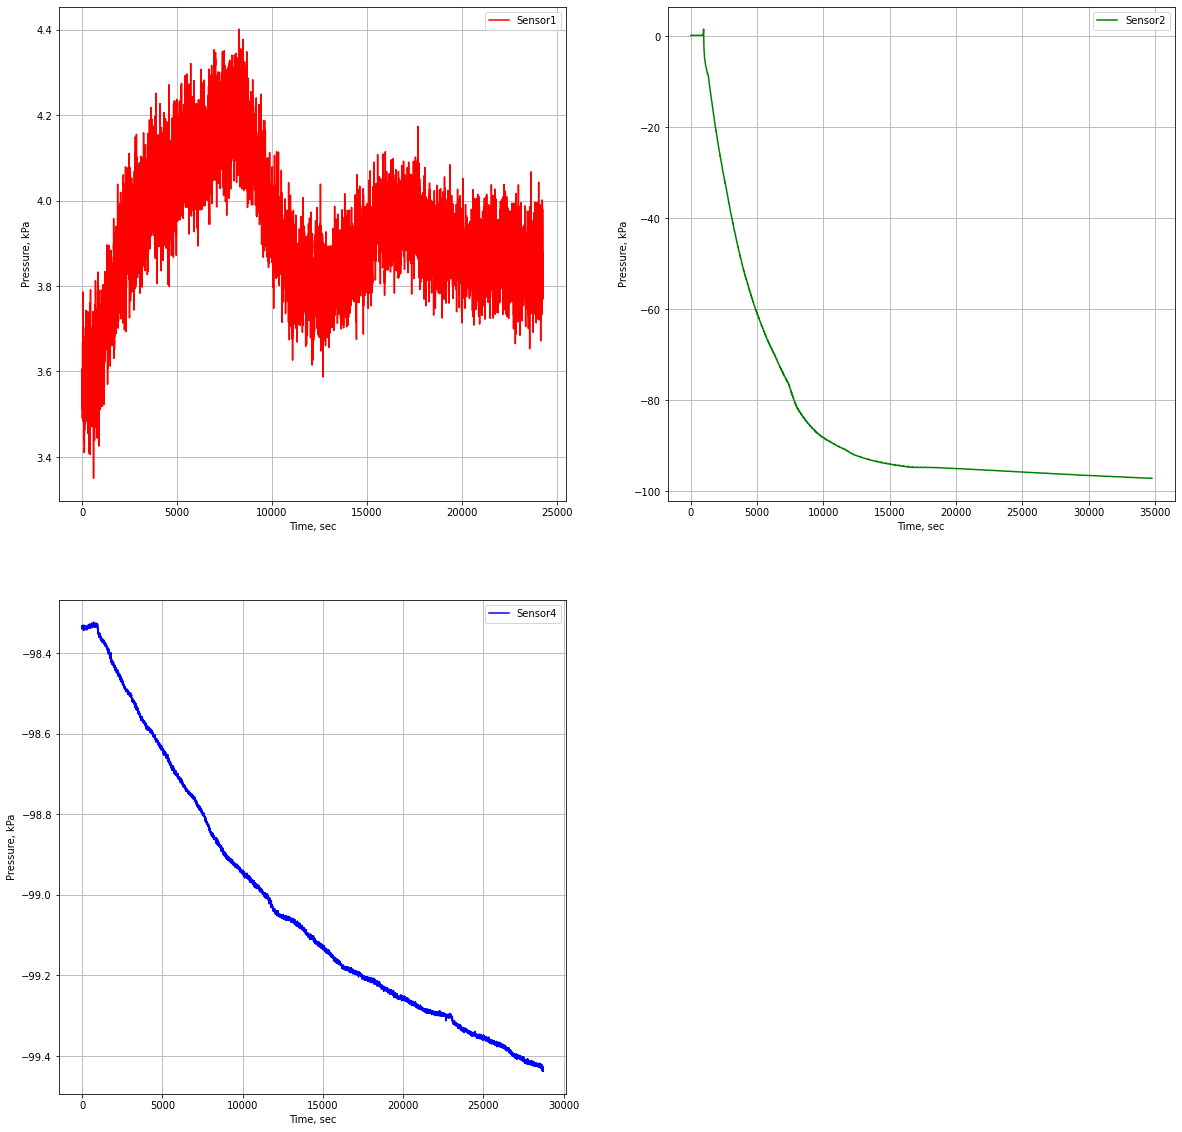

In [25]:
pressure_plot(sensor_1, sensor_2, sensor_4)

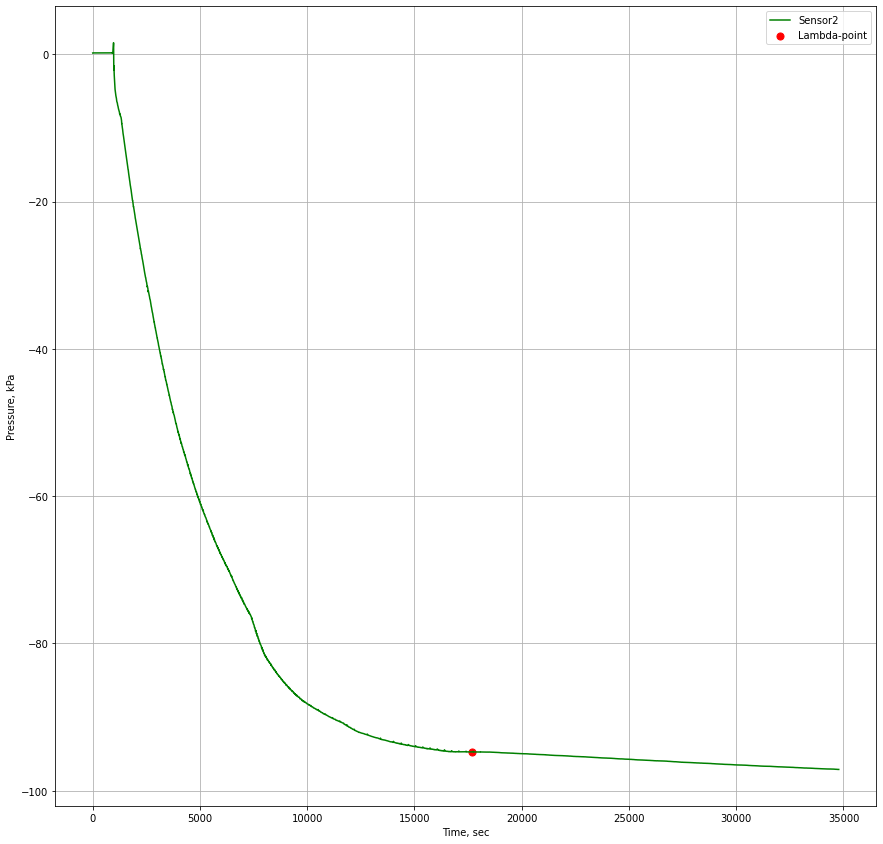

In [26]:
x_data = sensor_2['TotalTime']
y_data = sensor_2['Pressure, kPa']
plt.figure(figsize=(50, 50))

ax = plt.subplot(3,3,1)
plt.plot(x_data, y_data, color="green", label="Sensor2")
plt.scatter(17700,-94.7334, color="red", label="Lambda-point", s=50)
plt.xlabel("Time, sec")
plt.ylabel("Pressure, kPa")
plt.grid(True)
plt.legend()

In [27]:
sensor_2.loc[sensor_2['TotalTime'] == 17700]

,"Pressure, kPa",Time,Date,TotalTime
17603,-94.7334,3:24:42.654,28.11.20,17700


In [28]:
sensor_2.loc[sensor_2['TotalTime'] == sensor_2['TotalTime'].min()]

,"Pressure, kPa",Time,Date,TotalTime
0,0.172257,22:29:42.345,27.11.20,0
1,0.17408,22:29:43.342,27.11.20,0


In [29]:
sensor_2.loc[sensor_2['TotalTime'] == sensor_2['TotalTime'].max()]

,"Pressure, kPa",Time,Date,TotalTime
34584,-97.1066,8:09:22.957,28.11.20,34780


# Temperature data analysys

In [6]:
temp_frame_1 = pd.read_csv("TEMP_OTKACHKA_27.11.2020_22.39.xls", delimiter=',')
temp_frame_1

,T1,T2,T3,T4,T5,T6,T7,T8,Date,Time
0,4.476,4.227,4.235,1.203,1.2,1.203,1.203,4.186,27.11.2020,22:39:17
1,4.477,4.228,4.237,1.203,1.2,1.203,1.203,4.186,27.11.2020,22:39:19
2,4.477,4.228,3.814,1.203,1.2,1.203,1.203,4.186,27.11.2020,22:39:20
3,4.477,4.228,3.765,1.203,1.2,1.203,1.203,4.186,27.11.2020,22:39:21
4,4.477,4.228,3.727,1.203,1.2,1.203,1.203,4.186,27.11.2020,22:39:22
...,...,...,...,...,...,...,...,...,...,...
31303,1.000,1.202,500.000,1.203,1.2,1.203,1.203,1.202,28.11.2020,8:06:58
31304,1.000,1.202,500.000,1.203,1.2,1.203,1.203,1.202,28.11.2020,8:06:59
31305,1.000,1.202,500.000,1.203,1.2,1.203,1.203,1.202,28.11.2020,8:07:00
31306,1.000,1.202,500.000,1.203,1.2,1.203,1.203,1.202,28.11.2020,8:07:01


In [7]:
temp_frame_1['TotalTime'] = 0
dataparser(temp_frame_1)
temp_frame_1

,T1,T2,T3,T4,T5,T6,T7,T8,Date,Time,TotalTime
0,4.476,4.227,4.235,1.203,1.2,1.203,1.203,4.186,27.11.2020,22:39:17,2020-11-27 22:39:17
1,4.477,4.228,4.237,1.203,1.2,1.203,1.203,4.186,27.11.2020,22:39:19,2020-11-27 22:39:19
2,4.477,4.228,3.814,1.203,1.2,1.203,1.203,4.186,27.11.2020,22:39:20,2020-11-27 22:39:20
3,4.477,4.228,3.765,1.203,1.2,1.203,1.203,4.186,27.11.2020,22:39:21,2020-11-27 22:39:21
4,4.477,4.228,3.727,1.203,1.2,1.203,1.203,4.186,27.11.2020,22:39:22,2020-11-27 22:39:22
...,...,...,...,...,...,...,...,...,...,...,...
31303,1.000,1.202,500.000,1.203,1.2,1.203,1.203,1.202,28.11.2020,8:06:58,2020-11-28 08:06:58
31304,1.000,1.202,500.000,1.203,1.2,1.203,1.203,1.202,28.11.2020,8:06:59,2020-11-28 08:06:59
31305,1.000,1.202,500.000,1.203,1.2,1.203,1.203,1.202,28.11.2020,8:07:00,2020-11-28 08:07:00
31306,1.000,1.202,500.000,1.203,1.2,1.203,1.203,1.202,28.11.2020,8:07:01,2020-11-28 08:07:01


In [8]:
deltatime(temp_frame_1)

,T1,T2,T3,T4,T5,T6,T7,T8,Date,Time,TotalTime
0,4.476,4.227,4.235,1.203,1.2,1.203,1.203,4.186,27.11.2020,22:39:17,0
1,4.477,4.228,4.237,1.203,1.2,1.203,1.203,4.186,27.11.2020,22:39:19,2
2,4.477,4.228,3.814,1.203,1.2,1.203,1.203,4.186,27.11.2020,22:39:20,3
3,4.477,4.228,3.765,1.203,1.2,1.203,1.203,4.186,27.11.2020,22:39:21,4
4,4.477,4.228,3.727,1.203,1.2,1.203,1.203,4.186,27.11.2020,22:39:22,5
...,...,...,...,...,...,...,...,...,...,...,...
31303,1.000,1.202,500.000,1.203,1.2,1.203,1.203,1.202,28.11.2020,8:06:58,34061
31304,1.000,1.202,500.000,1.203,1.2,1.203,1.203,1.202,28.11.2020,8:06:59,34062
31305,1.000,1.202,500.000,1.203,1.2,1.203,1.203,1.202,28.11.2020,8:07:00,34063
31306,1.000,1.202,500.000,1.203,1.2,1.203,1.203,1.202,28.11.2020,8:07:01,34064


In [9]:
x_data = temp_frame_1["TotalTime"]
y_data = temp_frame_1.drop(["Time", "Date", "TotalTime"], 1)

# Зависимость температуры от времени проведения эксперимента

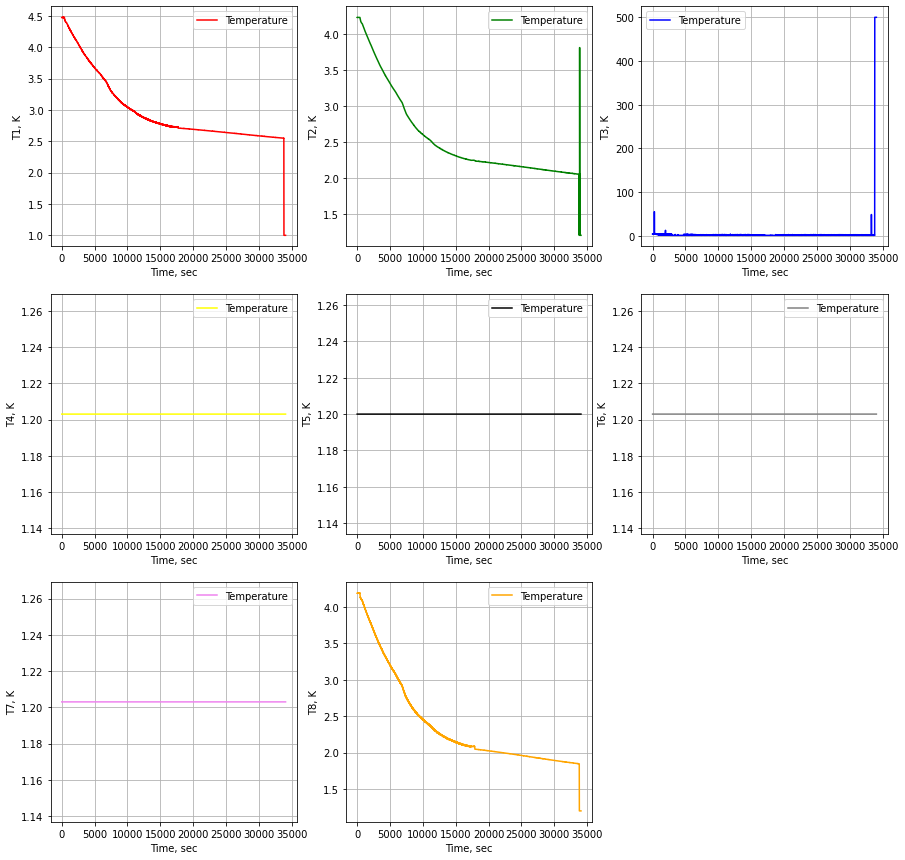

In [10]:
plt.figure(figsize=(15, 15))
colormap = ["red", "green", "blue", "yellow", "black", "gray", "violet", "orange"]
for i in range(1,9,1):
    ax = plt.subplot(3,3,i)
    plt.plot(x_data, y_data["T"+str(i)], color=colormap[i-1], label="Temperature")
    plt.xlabel("Time, sec")
    plt.ylabel("T{}, K".format(i))
    plt.grid(True)
    plt.legend()

In [11]:
y_data = temp_frame_1.drop(["Time", "Date", "TotalTime", "T3", "T4", "T5", "T6", "T7"], 1)

Датчики T4, T5, T6, T7 не функционировали.

Датчик T3 был плохо припаян, создавал помехи

Непонятный скачок в конце эксперимента на датчике T2

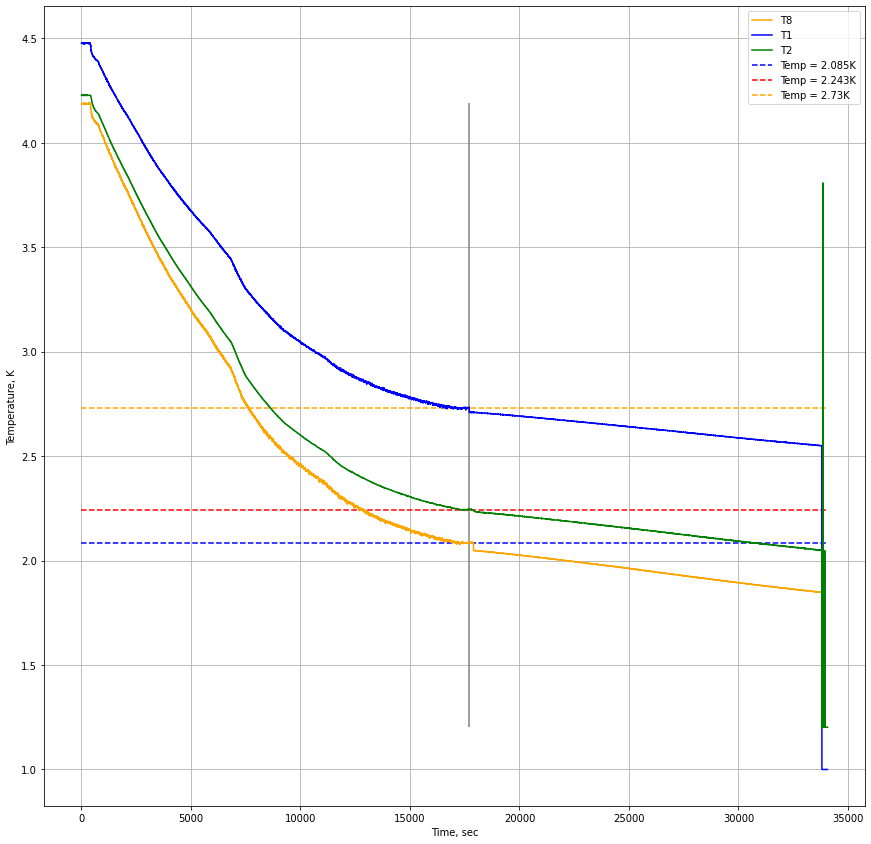

In [12]:
plt.figure(figsize=(50, 50))
ax = plt.subplot(3,3,1)
# ax.vlines(33800, y_data["T8"].min(), y_data["T8"].max(), color = 'r')
ax.vlines(17700, y_data["T8"].min(), y_data["T8"].max(), color = 'gray')
ax.hlines(2.085, x_data.min(), x_data.max(), color = 'b', linestyles = "dashed", label = "Temp = 2.085K")
ax.hlines(2.243, x_data.min(), x_data.max(), color = 'r', linestyles = "dashed", label = "Temp = 2.243K")
ax.hlines(2.73, x_data.min(), x_data.max(), color = 'orange', linestyles = "dashed", label = "Temp = 2.73K")

plt.plot(x_data, y_data["T8"], color="orange", label="T8")
plt.plot(x_data, y_data["T1"], color="blue", label="T1")
plt.plot(x_data, y_data["T2"], color="green", label="T2")
plt.xlabel("Time, sec")
plt.ylabel("Temperature, K")
plt.grid(True)
plt.legend()

In [13]:
print(y_data.loc[y_data['T1'] == 2.73])
print(y_data.loc[y_data['T8'] == 2.085])
print(y_data.loc[y_data['T2'] == 2.243])

         T1     T2     T8
15154  2.73  2.263  2.100
15265  2.73  2.259  2.099
15268  2.73  2.259  2.097
15269  2.73  2.259  2.098
15337  2.73  2.258  2.098
...     ...    ...    ...
16228  2.73  2.244  2.086
16232  2.73  2.245  2.086
16235  2.73  2.245  2.085
16236  2.73  2.245  2.085
16237  2.73  2.244  2.085

[150 rows x 3 columns]
          T1     T2     T8
15558  2.734  2.252  2.085
15559  2.734  2.252  2.085
15560  2.734  2.252  2.085
15561  2.733  2.252  2.085
15696  2.732  2.249  2.085
...      ...    ...    ...
16437  2.710  2.241  2.085
16438  2.710  2.240  2.085
16439  2.710  2.240  2.085
16440  2.709  2.240  2.085
16441  2.709  2.240  2.085

[138 rows x 3 columns]
Empty DataFrame
Columns: [T1, T2, T8]
Index: []


In [14]:
temp_frame_1 = temp_frame_1.drop(["T3", "T4", "T5", "T6", "T7"], 1)
temp_frame_1.loc[temp_frame_1['TotalTime'] == 33800]

,T1,T2,T8,Date,Time,TotalTime
31063,2.549,2.049,1.847,28.11.2020,8:02:37,33800


In [15]:
temp_frame_1.loc[temp_frame_1['TotalTime'] == temp_frame_1['TotalTime'].min()]

,T1,T2,T8,Date,Time,TotalTime
0,4.476,4.227,4.186,27.11.2020,22:39:17,0


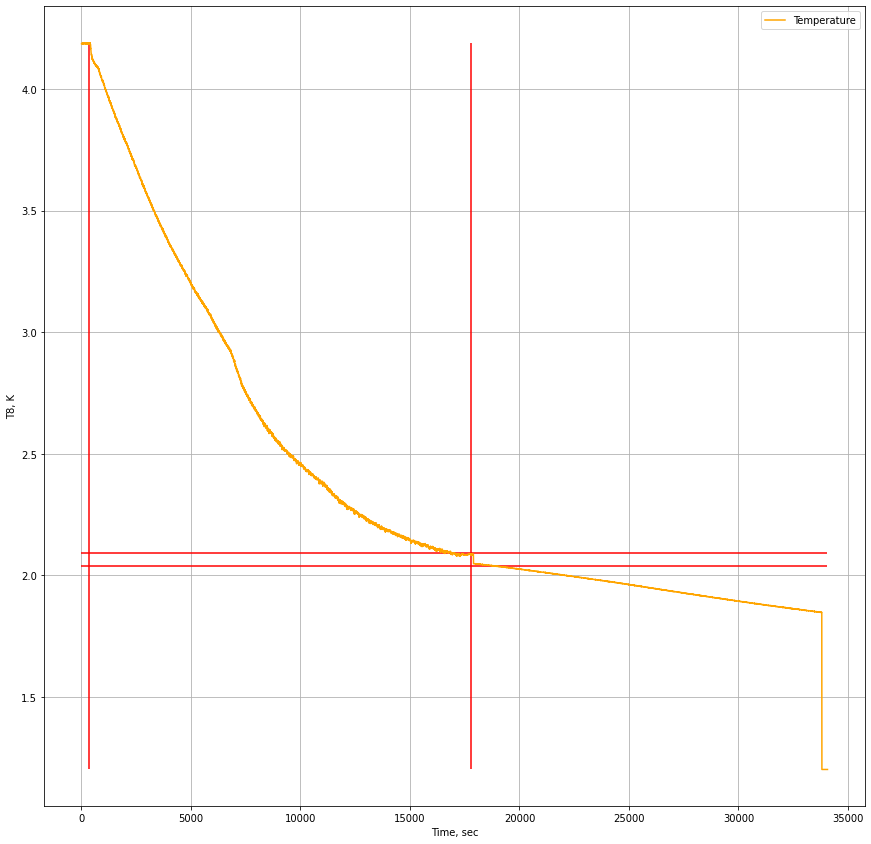

In [16]:
plt.figure(figsize=(50, 50))
ax = plt.subplot(3,3,1)
ax.vlines(17800, y_data["T8"].min(), y_data["T8"].max(), color = 'r')
ax.vlines(330, y_data["T8"].min(), y_data["T8"].max(), color = 'r')
ax.hlines(2.09, x_data.min(), x_data.max(), color = 'r')
ax.hlines(2.039, x_data.min(), x_data.max(), color = 'r')
plt.plot(x_data, y_data["T8"], color="orange", label="Temperature")
plt.xlabel("Time, sec")
plt.ylabel("T{}, K".format(8))
plt.grid(True)
plt.legend()

In [17]:
temp_frame_1.loc[temp_frame_1['TotalTime'] == 7500]

,T1,T2,T8,Date,Time,TotalTime
6885,3.301,2.884,2.756,28.11.2020,0:44:17,7500


In [18]:
#Зададим конечные точки 
y1 = 4.188
y2 = 3.677
y3 = 2.756
y4 = 2.114
y5 = 2.09

In [19]:
#Зададим конечные точки 
x1 = 330
x2 = 2500
x3 = 7500
x4 = 16000
x5 = 17800

In [20]:
#Зададим матрицу коэффициентов
X = np.array([[1, x1, x1**2, x1**3, x1**4],
              [1, x2, x2**2, x2**3, x2**4], 
              [1, x3, x3**2, x3**3, x3**4], 
              [1, x4, x4**2, x4**3, x4**4], 
              [1, x5, x5**2, x5**3, x5**4],
             ])
print(X, '\n')

#Зададим вектор решений
b = np.array([y1, y2, y3, y4, y5])
print(b)

[[                 1                330             108900
            35937000        11859210000]
 [                 1               2500            6250000
         15625000000     39062500000000]
 [                 1               7500           56250000
        421875000000   3164062500000000]
 [                 1              16000          256000000
       4096000000000  65536000000000000]
 [                 1              17800          316840000
       5639752000000 100387585600000000]] 

[4.188 3.677 2.756 2.114 2.09 ]


In [21]:
#Найдем решение нашей системы уравнений
import scipy.linalg
w = scipy.linalg.solve(X, b)
print(w)

[ 4.27018696e+00 -2.50585646e-04  4.53771982e-09  3.41654080e-13
 -1.08015137e-17]


In [22]:
def linf_2(x, w): # w - массив коэффициентов многочлена
    return w[4] * (x**4) + w[3] * (x**3) + w[2] * (x**2) + w[1] * x + w[0]

In [23]:
x_new = np.linspace(330, 17800, num=31308)
z_new = linf_2(x_new, w)
print(z_new)
print('\n')

[4.188      4.1878619  4.18772381 ... 2.09000889 2.09000445 2.09      ]




In [24]:
temp_frame_1.loc[temp_frame_1['TotalTime'] == 18900]

,T1,T2,T8,Date,Time,TotalTime
17367,2.701,2.225,2.038,28.11.2020,3:54:17,18900


In [25]:
#Зададим конечные точки 
y1 = 2.038
y2 = 2.026
y3 = 1.962
y4 = 1.908
y5 = 1.847

x1 = 17880
x2 = 20000
x3 = 25000
x4 = 29000
x5 = 33800

In [26]:
#Зададим матрицу коэффициентов
X = np.array([[1, x1, x1**2, x1**3, x1**4],
              [1, x2, x2**2, x2**3, x2**4], 
              [1, x3, x3**2, x3**3, x3**4], 
              [1, x4, x4**2, x4**3, x4**4], 
              [1, x5, x5**2, x5**3, x5**4],
             ])
print(X, '\n')

#Зададим вектор решений
b = np.array([y1, y2, y3, y4, y5])
print(b)

[[                  1               17880           319694400
        5716135872000  102204509391360000]
 [                  1               20000           400000000
        8000000000000  160000000000000000]
 [                  1               25000           625000000
       15625000000000  390625000000000000]
 [                  1               29000           841000000
       24389000000000  707281000000000000]
 [                  1               33800          1142440000
       38614472000000 1305169153600000000]] 

[2.038 2.026 1.962 1.908 1.847]


In [27]:
#Найдем решение нашей системы уравнений
import scipy.linalg
w = scipy.linalg.solve(X, b)
print(w)

[-1.19698432e-01  3.49520207e-04 -2.01891877e-08  4.93100355e-13
 -4.46145909e-18]


In [28]:
x = np.linspace(17880, 33800, num=31308)
z = linf_2(x, w)
print(z_new)
print('\n')

[4.188      4.1878619  4.18772381 ... 2.09000889 2.09000445 2.09      ]




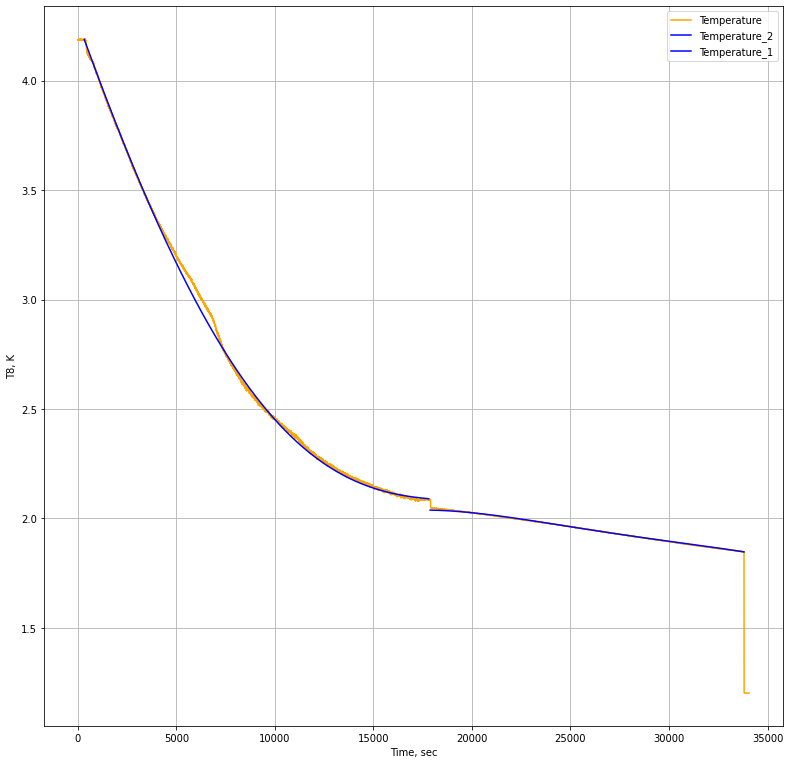

In [29]:
plt.figure(figsize=(45, 45))
ax = plt.subplot(3,3,1)
plt.plot(x_data, y_data["T8"], color="orange", label="Temperature")
plt.plot(x, z, color="blue", label="Temperature_2")
plt.plot(x_new, z_new, color="blue", label="Temperature_1")
plt.xlabel("Time, sec")
plt.ylabel("T{}, K".format(8))
plt.grid(True)
plt.legend()

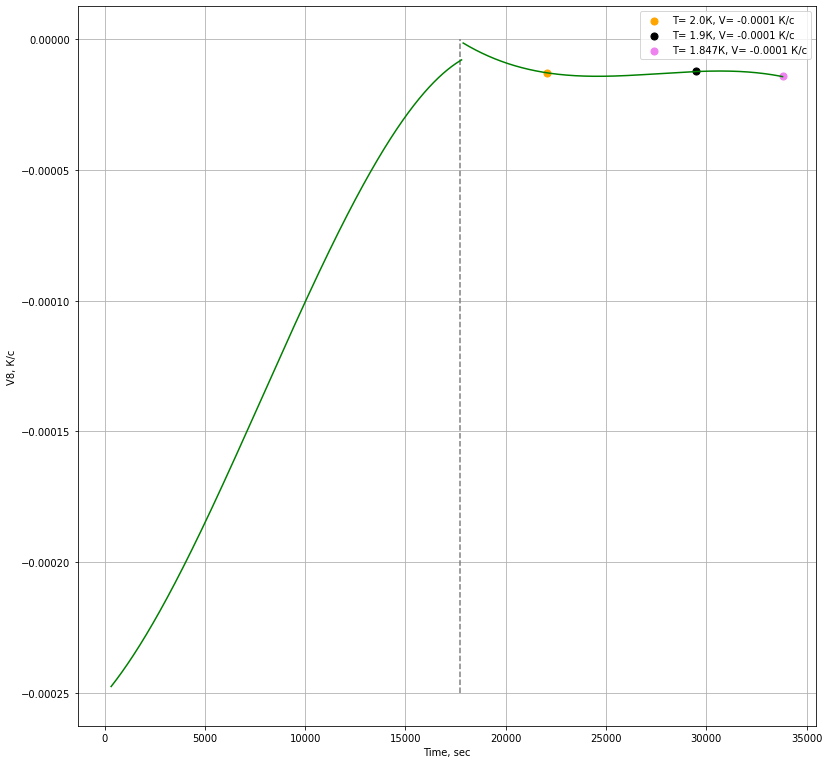

In [34]:
plt.figure(figsize=(45, 45))
ax = plt.subplot(3,3,1)
y_der1 = np.diff(z_new)/np.diff(x_new)
y_der2 = np.diff(z)/np.diff(x)
plt.plot(x_new[:-1], y_der1, color="green")
plt.plot(x[:-1], y_der2, color="green")
plt.scatter(22055, -0.0000129, color="orange", label="T= 2.0К, V= -0.0001 К/с", s=50)
plt.scatter(29497, -0.0000124, color="black", label="T= 1.9К, V= -0.0001 К/с", s=50)
plt.scatter(33800, -0.0000142, color="violet", label="T= 1.847К, V= -0.0001 К/с", s=50)
ax.vlines(17700, -0.00025, 0, color = 'gray', linestyles = "dashed")
plt.xlabel("Time, sec")
plt.ylabel("V{}, К/с".format(8))
plt.grid(True)
plt.legend()

In [51]:
y_data_1 = y_data["T8"].drop(y_data["T8"][y_data["T8"] < 1.847].index)

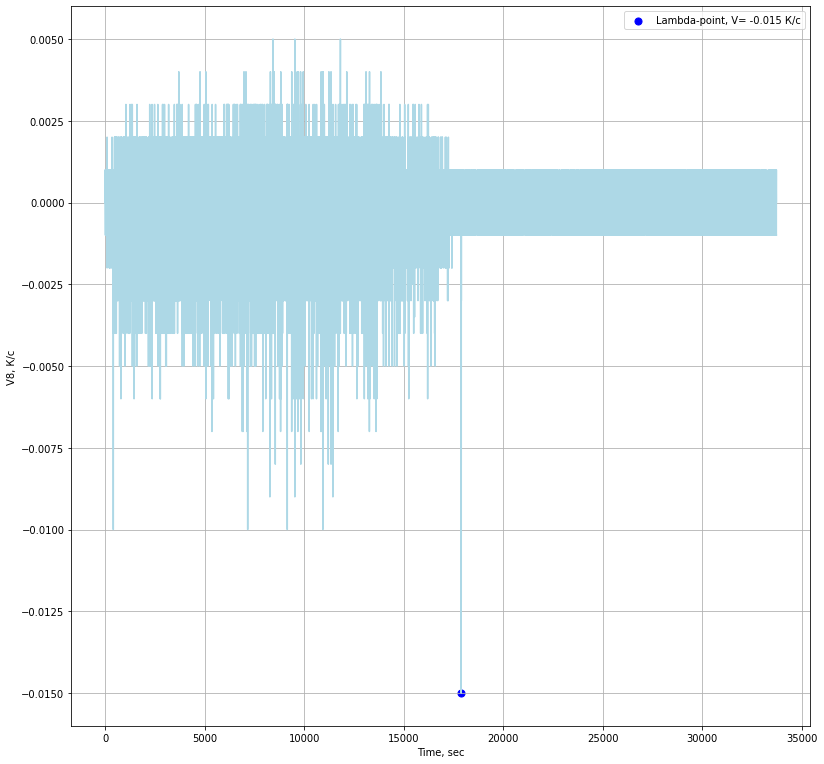

In [33]:
plt.figure(figsize=(45, 45))
ax = plt.subplot(3,3,1)
# plt.plot(x, y_data["T8"], color="orange", label="Temperature")
# plt.plot(x, z, color="blue", label="Temperature")
y_der = np.diff(y_data["T8"].to_numpy())/np.diff(x_data)
y_der2 = np.diff(z)/np.diff(x)
plt.plot(x_data[:31000], y_der[:31000], color="lightblue")
# plt.plot(x[:-1], y_der2, color="green")
plt.scatter(17885, -0.015, color="blue", label="Lambda-point, V= -0.015 К/с", s=50)
plt.xlabel("Time, sec")
plt.ylabel("V{}, К/с".format(8))
plt.grid(True)
plt.legend()

In [53]:
y_der[21000:31000]

array([0.0, 0.0, 0.0, ..., -0.0009999999999998899, 0.0009999999999998899,
       -0.0009999999999998899], dtype=object)

# Volume data analysys

In [97]:
volume_frame = pd.read_csv("LEVEL_OTKACHKA_27.11.2020_22.39.xls", delimiter=',')
volume_frame

,Volume,Date,Time
0,108.3,27.11.2020,22:39:39
1,108.3,27.11.2020,22:39:40
2,108.3,27.11.2020,22:39:41
3,108.3,27.11.2020,22:39:42
4,108.3,27.11.2020,22:39:43
...,...,...,...
34161,63.5,28.11.2020,8:09:17
34162,63.5,28.11.2020,8:09:18
34163,63.5,28.11.2020,8:09:19
34164,63.5,28.11.2020,8:09:20


In [180]:
volume_frame['TotalTime'] = 0
dataparser(volume_frame)
volume_frame

,Volume,Date,Time,TotalTime
0,108.3,27.11.2020,22:39:39,2020-11-27 22:39:39
1,108.3,27.11.2020,22:39:40,2020-11-27 22:39:40
2,108.3,27.11.2020,22:39:41,2020-11-27 22:39:41
3,108.3,27.11.2020,22:39:42,2020-11-27 22:39:42
4,108.3,27.11.2020,22:39:43,2020-11-27 22:39:43
...,...,...,...,...
34161,63.5,28.11.2020,8:09:17,2020-11-28 08:09:17
34162,63.5,28.11.2020,8:09:18,2020-11-28 08:09:18
34163,63.5,28.11.2020,8:09:19,2020-11-28 08:09:19
34164,63.5,28.11.2020,8:09:20,2020-11-28 08:09:20


In [181]:
deltatime(volume_frame)

,Volume,Date,Time,TotalTime
0,108.3,27.11.2020,22:39:39,0
1,108.3,27.11.2020,22:39:40,1
2,108.3,27.11.2020,22:39:41,2
3,108.3,27.11.2020,22:39:42,3
4,108.3,27.11.2020,22:39:43,4
...,...,...,...,...
34161,63.5,28.11.2020,8:09:17,34178
34162,63.5,28.11.2020,8:09:18,34179
34163,63.5,28.11.2020,8:09:19,34180
34164,63.5,28.11.2020,8:09:20,34181


In [182]:
x_data_volume = volume_frame["TotalTime"]
y_data_volume = volume_frame["Volume"]

# Зависимость уровня жидкого от времени проведения эксперимента

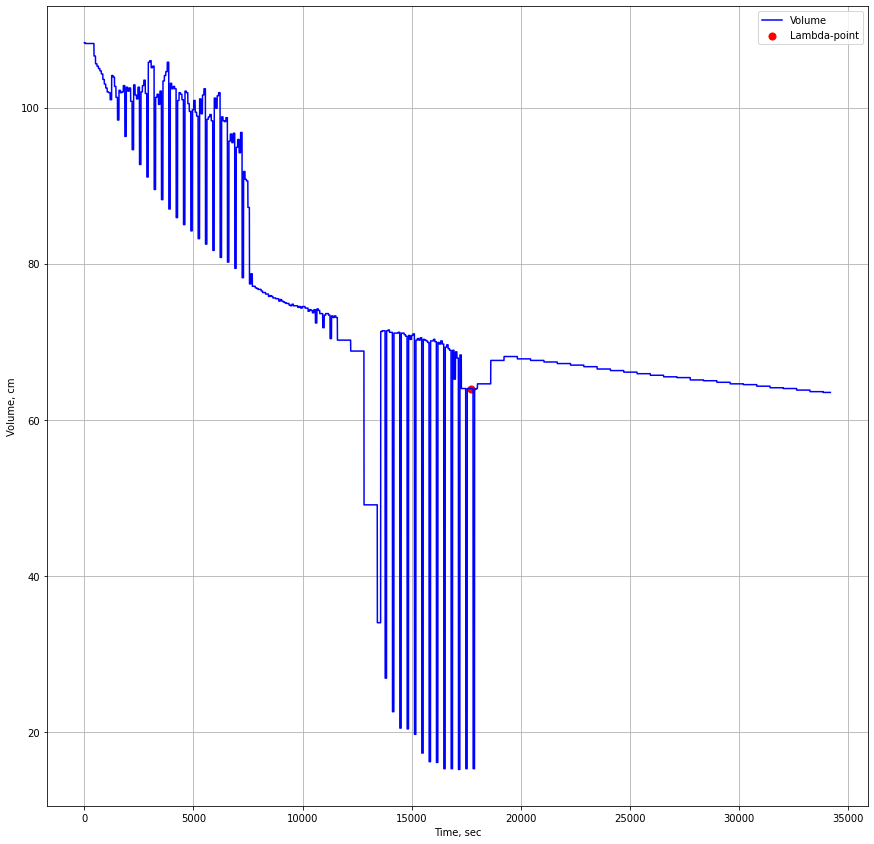

In [269]:
plt.figure(figsize=(50, 50))
ax = plt.subplot(3,3,1)
# ax.vlines(17700, y_data_volume.min(), y_data_volume.max(), color = 'r')
# ax.hlines(64.0, x_data_volume.min(), x_data_volume.max(), color = 'r')
plt.plot(x_data_volume, y_data_volume, color="blue", label="Volume")
plt.scatter(17700, 64.0, color="red", label="Lambda-point", s=50)
plt.xlabel("Time, sec")
plt.ylabel("Volume, cm")
plt.grid(True)
plt.legend()

Непонятные для меня скачки в дипазоне от 1000 до 7500 и от 12500 до 18000 секунд.

In [239]:
volume_frame.loc[volume_frame['TotalTime'] == 17700]

,Volume,Date,Time,TotalTime
17688,64.0,28.11.2020,3:34:39,17700


In [262]:
volume_frame.loc[volume_frame['TotalTime'] == volume_frame['TotalTime'].max()]

,Volume,Date,Time,TotalTime
34165,63.5,28.11.2020,8:09:21,34182


In [263]:
volume_frame.loc[volume_frame['TotalTime'] == volume_frame['TotalTime'].min()]

,Volume,Date,Time,TotalTime
0,108.3,27.11.2020,22:39:39,0
